In [5]:
from PIL import Image
from tqdm.auto import tqdm
import pathlib
import os
import multiprocessing as mp
import numpy as np
import random
from numpy.random import default_rng

DATA_ROOT = '/data1/Raw/Reddit/full/EarthPorn'
DATA_OUT = '/data2/goghgetpaper2/'

root_probability = 0.5

rng = default_rng(seed=42)

In [8]:
path = pathlib.Path(DATA_ROOT)
files = list(path.glob('**/*.jpg'))
print(len(files))

146886


In [12]:
def get_crop(im, i, j):
    left = i*64
    top = j*64
    right = (i+1)*64
    bottom = (j+1)*64
    
    return im.crop((left, top, right, bottom))


def break64(file):
    with Image.open(file).convert('RGB') as im:
        width, height = im.size
        
        cols = width//64
        rows = height//64
        
        rows_j = rng.integers(low=0, high=rows-1, size=3)
        cols_i = rng.integers(low=0, high=cols-1, size=3)
        
        left_images = []
        right_images = []
        bot_images = []
        diag_images = []

        for k in range(3):
            i = cols_i[k]
            j = rows_j[k]
            
            root = get_crop(im, i, j)
            right = get_crop(im, i+1, j)
            bottom = get_crop(im, i, j+1)
            diag = get_crop(im, i+1, j+1)
            
            left_images.append(root)
            right_images.append(right)
            
            bot_images.append(bottom)
            
            diag_images.append(diag)

        return left_images, right_images, bot_images, diag_images

In [15]:
def save_img(im, out):
    if pathlib.Path(out).exists():
        return
    try:
        im.save(out)
    except Exception as e:
        print(out, e)

def worker(file):
    filename = file.stem
    
    topleft = 'topleft'
    topright = 'topright'
    botleft = 'botleft'
    botright = 'botright'
    
    try:
        left_images, right_images, bot_images, diag_images = break64(file)
    except:
        return
    
    for i in range(len(left_images)):
        topleftOut = pathlib.Path(DATA_OUT, topleft, filename + '-{}.jpg'.format(i))
        topleftOut.parent.mkdir(parents=True, exist_ok=True)
        
        toprightOut = pathlib.Path(DATA_OUT, topright, filename + '-{}.jpg'.format(i))
        toprightOut.parent.mkdir(parents=True, exist_ok=True)
        
        botleftOut = pathlib.Path(DATA_OUT, botleft, filename + '-{}.jpg'.format(i))
        botleftOut.parent.mkdir(parents=True, exist_ok=True)
        
        botrightOut = pathlib.Path(DATA_OUT, botright, filename + '-{}.jpg'.format(i))
        botrightOut.parent.mkdir(parents=True, exist_ok=True)
        
        save_img(left_images[i], topleftOut)
        save_img(right_images[i], toprightOut)
        save_img(bot_images[i], botleftOut)
        save_img(diag_images[i], botrightOut)

In [16]:
for file in tqdm(files):
    worker(file)

/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (102619851 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (124615400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (101082464 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/an

/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (90952587 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (100835904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (96478848 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (151301008 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andr

In [36]:
# verify images
import matplotlib.pyplot as plt
import random

file = random.choice(files)
filename = file.stem

org_img = Image.open(file).convert('RGB')

left_img = Image.open(pathlib.Path(DATA_OUT, 'topleft', filename + '-0.jpg')).convert('RGB')
right_img = Image.open(pathlib.Path(DATA_OUT, 'topright', filename + '-0.jpg')).convert('RGB')
bot_img = Image.open(pathlib.Path(DATA_OUT, 'botleft', filename + '-0.jpg')).convert('RGB')
diag_img = Image.open(pathlib.Path(DATA_OUT, 'botright', filename + '-0.jpg')).convert('RGB')

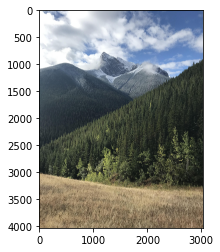

In [37]:
plt.figure(figsize=(4,4))
plt.imshow(np.array(org_img))

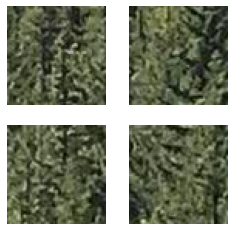

In [38]:
# Plot the real images
plt.figure(figsize=(4,4))
plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(np.array(left_img))

# Plot the fake images from the last epoch
plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(np.array(right_img))

plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(np.array(bot_img))

plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(np.array(diag_img))


plt.show()